## NLP Assignment 1 -  
#### 17210017

#### Assumptions
##### Downloaded TomSwayer file, but deleted the part before Chapter 1 

In [381]:
from nltk import word_tokenize,sent_tokenize
import collections
from collections import Counter
from pylab import *
import matplotlib.pyplot as plt
import os
from math import log
import numpy as np
from sklearn import linear_model

In [382]:
# read file content
book = open('TomSwayer.txt','r',encoding="utf-8-sig")
content = book.read()

##### TTR | Type | Token

In [390]:
tokens = word_tokenize(content)
tokens = [word for word in tokens if word.isalpha()]
types = (set(tokens))
TTR = len(types)/len(tokens)

In [384]:
print ("Types - ",len(types))
print("Tokens - ",len(tokens))
print("TTR - ",TTR)

Types -  8149
Tokens -  72637
TTR -  0.11218800335916956


##### WordCount

In [391]:
wordcount = {} # dictionary for keeping count of each word
for word in tokens:
    if word not in wordcount:
        wordcount[word]=1
    else:
        wordcount[word] += 1

In [392]:
wcDict = wordcount 
wordcount = sorted(wordcount.items(),key=lambda x: x[1],reverse=True)
ranks = arange(1,len(types)+1)# for ranking the words

In [393]:
xaxis = [] # storing f*r
yaxis = [] # frequency
i = 0
for tup in wordcount:
    xaxis.append(tup[1]*ranks[i])
    yaxis.append(tup[1])
    i+=1

In [394]:
# calculating log of frequency and ranks asscoiated with it
freq = [log(y,2) for y in yaxis]
ranks = [log(y,2) for y in ranks]

Text(0.5,1,'Zipfs Law')

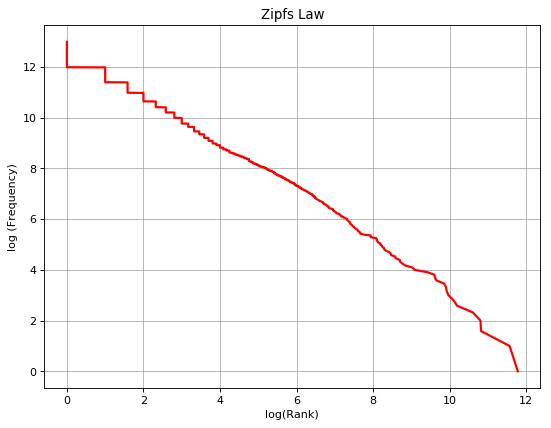

In [395]:
plt.figure(figsize=(8,6),dpi=80)
plt.plot(freq,ranks,color="red",linewidth=2.0,linestyle="-")
plt.grid(b=True)
plt.xlabel("log(Rank)")
plt.ylabel("log (Frequency)")
plt.title('Zipfs Law')

##### Meaning and length of structure | Zipfs law

In [396]:
list_str = ['strong','sheathed','immortal','grave','appealing','little','come','through','slack','over','right']
meaning=[2,2,4,4,5,5,8,10,12,12,16]
frequency=[] #frequency of above chosen word from corpus
length=[] # length of each above word
#finding number of meanings for these word
for string in list_str:
    length.append(len(string))
    frequency.append(wcDict[string])

Text(0,0.5,'Meaning')

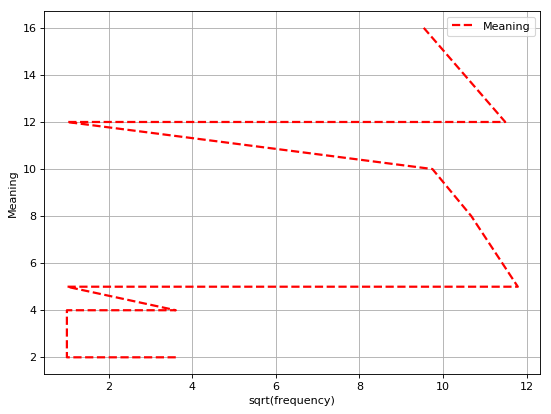

In [398]:
#meaning-frequency plot
plt.figure(figsize=(8,6),dpi=80)
plt.plot(np.sqrt(frequency),meaning,color="red",linewidth=2.0,linestyle='--',label='Meaning')
plt.grid(b=True)
plt.legend()
plt.xlabel("sqrt(frequency)")
plt.ylabel('Meaning')

Text(0,0.5,'Length of Structure')

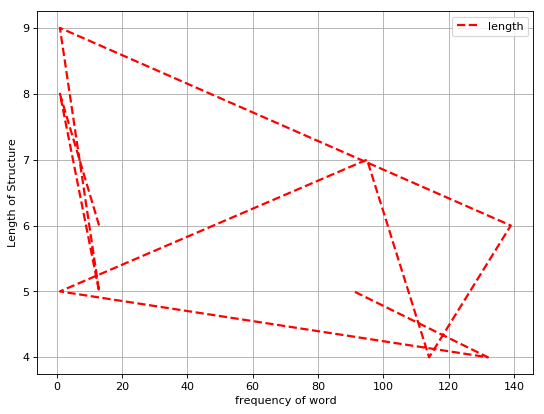

In [399]:
#length-frequency plot
plt.figure(figsize=(8,6),dpi=80)
plt.plot(frequency,length,color="red",linewidth=2.0,linestyle="--",label='length')
plt.grid(b=True)
plt.legend()
plt.xlabel("frequency of word")
plt.ylabel('Length of Structure')

#### Heap's Law:
##### Describes the number of distinct words in a document (or set of documents) as a function of the document length (so called type-token relation). It can be formulated as

$ {V_{R}(n) = Kn^{\beta}}$

###### 1.each sentence of the above corpus is considered as Document.

In [340]:
# split the corpus into paragraphs
sent_list = sent_tokenize(content)

In [356]:
N=[] # token size of all the corpus seen by this time
V=[] # types of word seen so far
Vocab=set() # for maintaing distinct words
tokenCount=0
i=0
prevToken=0
for string in sent_list:
    tokens=word_tokenize(string)
    tokens = [word for word in tokens if word.isalpha()]
    Vocab = Vocab.union(set(tokens))
    N.append(len(tokens)+prevToken)
    V.append(len(Vocab))
    prevToken=N[i]
    i+=1
#print(N)
#print(V)

In [370]:
# converting above mentioned formula into the form y=mx+c by taking log
N_log = np.log2(N) 
V_log = np.log2(V)
N_np = np.ones((len(N),2))
N_np[:,1]=N_log

## building model
model = linear_model.LinearRegression()
model.fit(N_np,V_log)
param=model.coef_ # coefficient logK and B
## finding the predicted vocab size given N,K,B using original formula
K = np.power(2,param[0])
B = param[1]
V_predict = np.power(N,B)
print("K - ",K)
print("B - ",B)

K -  1.0
B -  0.6254590298116876


Text(0.5,1,'Heaps Law')

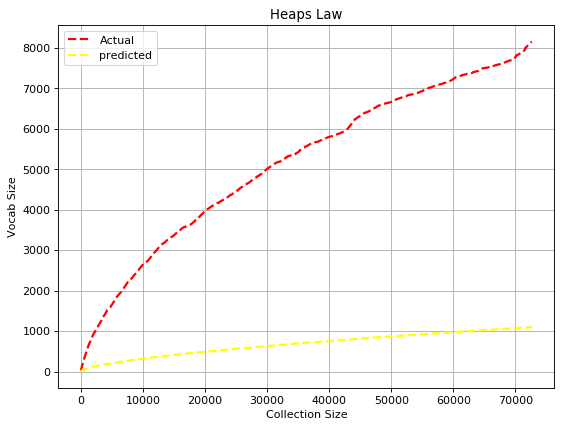

In [372]:
# Heaps law plot
plt.figure(figsize=(8,6),dpi=80)
plt.plot(N,V,color="red",linewidth=2.0,linestyle="--",label='Actual')
plt.plot(N,V_predict,color="Yellow",linewidth=2.0,linestyle="--",label='predicted')
plt.grid(b=True)
plt.legend()
plt.xlabel("Collection Size")
plt.ylabel("Vocab Size")
plt.title('Heaps Law')

##### Assignment ends!